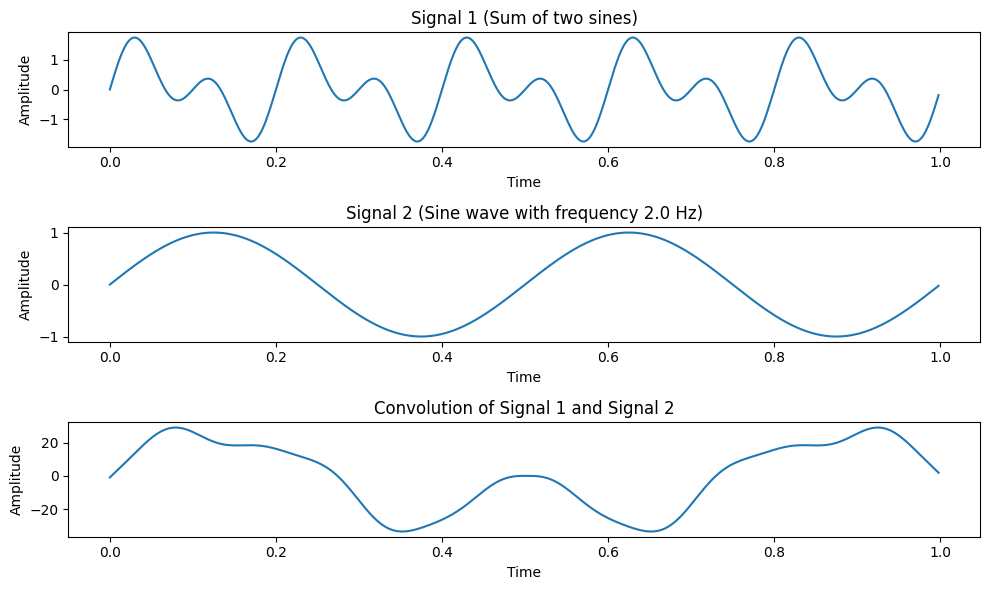

In [ ]:
# prompt: realiza la convolicion entre dos señales, la primera debe ser la suma de dos senos de diferentes frecuencias, la segunda un seno el cual pueda cambiar su frecuencia mediante un widget

import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

# Sample rate and time vector
fs = 100  # Samples per second
t = np.arange(0, 1, 1/fs)

# First signal: sum of two sines
f1 = 5  # Frequency of the first sine wave
f2 = 50 # Frequency of the second sine wave
signal1 = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t)

@interact(f2=(0,100,1))

def convolve_signals(f2=1):
    # Second signal: a single sine wave with variable frequency
    signal2 = np.sin(2 * np.pi * f2 * t)

    # Convolution
    convolution = np.convolve(signal1, signal2, mode='full')

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.subplot(3, 1, 1)
    plt.plot(t, signal1)
    plt.title('Signal 1 (Sum of two sine waves)')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    plt.subplot(3, 1, 2)
    plt.plot(t, signal2)
    plt.title(f'Signal 2 (Sine wave with frequency {f3} Hz)')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    plt.subplot(3, 1, 3)
    plt.plot(np.convolve(signal1,signal2,mode="full"))
    plt.ylim(-500,500)
    plt.tight_layout()
    plt.show()




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

In [ ]:
@interact(f2=(0,100,1))
def fn(f2=1):
  plt.figure(figsize=(20,9),dpi=70)
  t=np.linspace(0,1,1000,endpoint=False)
  plt.subplot(2,2,1)
  signal1=np.sin(2*np.pi*5*t)+np.sin(2*np.pi*50*t)
  plt.plot(signal1)
  plt.title('Signal 1')
  plt.subplot(2,2,2)
  signal2=np.sin(2*np.pi*f2*t)
  plt.plot(signal2)
  plt.title('Signal 2')
  plt.subplot(2,1,2)
  plt.plot(np.convolve(signal1,signal2,mode="full"))
  plt.ylim(-500,500)
  plt.show()

interactive(children=(IntSlider(value=1, description='f2'), Output()), _dom_classes=('widget-interact',))

In [ ]:
np.convolve??


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import morlet
from ipywidgets import interact, IntSlider

def generate_morlet_wavelet(length, f, shift=0):
    t = np.linspace(-2.5, 2.5, length, endpoint=False)  # Ampliando el espectro
    wavelet = np.real(morlet(length, w=5, s=f))
    wavelet = np.roll(wavelet, shift)  # Desplazamiento de la onda Morlet
    return wavelet

@interact(f2=(0.1, 10, 0.1), shift=IntSlider(min=-1000, max=1000, step=10, value=0))  # Frecuencia y desplazamiento de la onda Morlet
def fn(f2=1, shift=0):
    plt.figure(figsize=(20, 9), dpi=70)
    t = np.linspace(0, 1, 2000, endpoint=False)  # Aumentando la resolución temporal

    plt.subplot(2, 2, 1)
    signal1 = np.sin(2 * np.pi * 5 * t) + np.sin(2 * np.pi * 50 * t)
    plt.plot(signal1)
    plt.title('Signal 1')

    plt.subplot(2, 2, 2)
    signal2 = generate_morlet_wavelet(len(t), f2, shift)
    plt.plot(signal2)
    plt.title('Morlet Wavelet (Shifted)')

    plt.subplot(2, 1, 2)
    plt.plot(np.convolve(signal1, signal2, mode="full"))
    plt.ylim(-500, 500)
    plt.title('Convolution of Signal 1 and Morlet Wavelet')

    plt.show()


interactive(children=(FloatSlider(value=1.0, description='f2', max=10.0, min=0.1), IntSlider(value=0, descript…